Files already downloaded and verified
Files already downloaded and verified


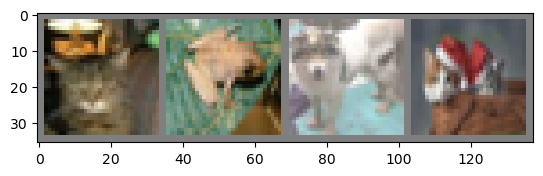

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper-parameters 
num_epoches = 4
batch_size = 4
learning_rate = 0.001

# dataset : PILImage images of range [0, 1]
# transform to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False
)

classes = (
    'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [3]:
# CNN
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epoches):
    for i, (images, labels) in enumerate(train_loader):
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'Epoch [ {epoch+1}/{num_epoches} ], Step [ {i+1}/{n_total_steps} ], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [ 1/4 ], Step [ 2000/12500 ], Loss: 2.3117
Epoch [ 1/4 ], Step [ 4000/12500 ], Loss: 2.3270
Epoch [ 1/4 ], Step [ 6000/12500 ], Loss: 2.2921
Epoch [ 1/4 ], Step [ 8000/12500 ], Loss: 2.2507
Epoch [ 1/4 ], Step [ 10000/12500 ], Loss: 2.2744
Epoch [ 1/4 ], Step [ 12000/12500 ], Loss: 2.1510
Epoch [ 2/4 ], Step [ 2000/12500 ], Loss: 2.3236
Epoch [ 2/4 ], Step [ 4000/12500 ], Loss: 1.7924
Epoch [ 2/4 ], Step [ 6000/12500 ], Loss: 1.6951
Epoch [ 2/4 ], Step [ 8000/12500 ], Loss: 2.1609
Epoch [ 2/4 ], Step [ 10000/12500 ], Loss: 2.3809
Epoch [ 2/4 ], Step [ 12000/12500 ], Loss: 1.3557
Epoch [ 3/4 ], Step [ 2000/12500 ], Loss: 1.8989
Epoch [ 3/4 ], Step [ 4000/12500 ], Loss: 1.4194
Epoch [ 3/4 ], Step [ 6000/12500 ], Loss: 1.4052
Epoch [ 3/4 ], Step [ 8000/12500 ], Loss: 1.7671
Epoch [ 3/4 ], Step [ 10000/12500 ], Loss: 2.0592
Epoch [ 3/4 ], Step [ 12000/12500 ], Loss: 1.3665
Epoch [ 4/4 ], Step [ 2000/12500 ], Loss: 1.0984
Epoch [ 4/4 ], Step [ 4000/12500 ], Loss: 2.5729
Epoch [ 4/4 ],

In [4]:
model.eval()
n_correct = 0
n_samples = 0
n_class_correct = [0 for i in range(10)]
n_class_samples = [0 for i in range(10)]
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    for i in range(batch_size):
        label = labels[i]
        pred = predicted[i]
        if (label == pred):
            n_class_correct[label] += 1
        n_class_samples[label] += 1

acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network: {acc} %')

for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 45.91 %
Accuracy of plane: 56.5 %
Accuracy of car: 63.8 %
Accuracy of bird: 21.5 %
Accuracy of cat: 13.0 %
Accuracy of deer: 33.9 %
Accuracy of dog: 58.9 %
Accuracy of frog: 52.2 %
Accuracy of horse: 58.9 %
Accuracy of ship: 49.9 %
Accuracy of truck: 50.5 %
